In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [ ]:
import re
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
import pickle

import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Adidas Vs Nike.csv', header=0,index_col=0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3265 entries, Women's adidas Originals NMD_Racer Primeknit Shoes to Nike P-6000 SE
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product ID     3265 non-null   object 
 1   Listing Price  3265 non-null   int64  
 2   Sale Price     3265 non-null   int64  
 3   Discount       3265 non-null   int64  
 4   Brand-name     3265 non-null   object 
 5   Brand          3265 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3265 non-null   float64
 8   Reviews        3265 non-null   int64  
 9   Last Visited   3265 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 280.6+ KB


In [ ]:
df.isnull().sum()

Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand-name       0
Brand            0
Description      0
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [ ]:
df['Listing Price']

Product Name
Women's adidas Originals NMD_Racer Primeknit Shoes    14999
Women's adidas Originals Sleek Shoes                   7599
Women's adidas Swim Puka Slippers                       999
Women's adidas Sport Inspired Questar Ride Shoes       6999
Women's adidas Originals Taekwondo Shoes               7999
                                                      ...  
Air Jordan 8 Retro                                    15995
Nike Phantom Venom Club IC                             4995
Nike Mercurial Superfly 7 Academy TF                   8495
Nike Air Max 98                                           0
Nike P-6000 SE                                         8995
Name: Listing Price, Length: 3265, dtype: int64

In [ ]:
df.dropna(subset=['Listing Price'], inplace=True)

In [ ]:
df.isnull().sum()

Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand-name       0
Brand            0
Description      0
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [ ]:
label_encoder = LabelEncoder()
df['brand_encoded'] = label_encoder.fit_transform(df['Brand-name'])
df=df.drop('Brand-name',axis=1)
df.head()

,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,brand_encoded
Product Name,,,,,,,,,,
Women's adidas Originals NMD_Racer Primeknit Shoes,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,0
Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,2
Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,1
Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,1
Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,2


In [ ]:
df['Combined_Columns']= df['Brand'].astype(str) + df['Description']
print(df)

                                                    Product ID  Listing Price  \
Product Name                                                                    
Women's adidas Originals NMD_Racer Primeknit Shoes      AH2430          14999   
Women's adidas Originals Sleek Shoes                    G27341           7599   
Women's adidas Swim Puka Slippers                       CM0081            999   
Women's adidas Sport Inspired Questar Ride Shoes        B44832           6999   
Women's adidas Originals Taekwondo Shoes                D98205           7999   
...                                                        ...            ...   
Air Jordan 8 Retro                                  CI1236-100          15995   
Nike Phantom Venom Club IC                          AO0578-717           4995   
Nike Mercurial Superfly 7 Academy TF                AT7978-414           8495   
Nike Air Max 98                                     AH6799-300              0   
Nike P-6000 SE              

In [ ]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [ ]:
def remove_stop_words(sentence):
    if isinstance(sentence, str):
        word_tokens = word_tokenize(sentence)
        filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
        return ' '.join(filtered_sentence)
    else:
        return sentence

In [ ]:
#Show some stop words
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [ ]:
df['Description'] = df['Description'].apply(remove_stop_words)
print(df['Description'])

Product Name
Women's adidas Originals NMD_Racer Primeknit Shoes    Channeling streamlined look '80s racer , shoes...
Women's adidas Originals Sleek Shoes                  modern take adidas sport heritage , tailored w...
Women's adidas Swim Puka Slippers                     adidas Puka slippers women 's come slim straps...
Women's adidas Sport Inspired Questar Ride Shoes      Inspired modern tech runners , women 's shoes ...
Women's adidas Originals Taekwondo Shoes              design inspired vintage Taekwondo styles origi...
                                                                            ...                        
Air Jordan 8 Retro                                    Air Jordan 8 Retro recaptures memorable look '...
Nike Phantom Venom Club IC                            Nike Phantom Venom Club IC engineered powerful...
Nike Mercurial Superfly 7 Academy TF                  soft upper Nike Mercurial Superfly 7 Academy T...
Nike Air Max 98                                    

In [ ]:
x = df.drop('brand_encoded', axis=1)# Drop the target column
x1=df['Description']
y = df['brand_encoded']
print(x1)
print(y.shape)

Product Name
Women's adidas Originals NMD_Racer Primeknit Shoes    Channeling streamlined look '80s racer , shoes...
Women's adidas Originals Sleek Shoes                  modern take adidas sport heritage , tailored w...
Women's adidas Swim Puka Slippers                     adidas Puka slippers women 's come slim straps...
Women's adidas Sport Inspired Questar Ride Shoes      Inspired modern tech runners , women 's shoes ...
Women's adidas Originals Taekwondo Shoes              design inspired vintage Taekwondo styles origi...
                                                                            ...                        
Air Jordan 8 Retro                                    Air Jordan 8 Retro recaptures memorable look '...
Nike Phantom Venom Club IC                            Nike Phantom Venom Club IC engineered powerful...
Nike Mercurial Superfly 7 Academy TF                  soft upper Nike Mercurial Superfly 7 Academy T...
Nike Air Max 98                                    

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=42)
print(y_test.shape)

(653,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vectorizer = CountVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)
print(X_train_tfidf.shape)
print(y_train.shape)

(2612, 4225)
(2612,)


In [ ]:
if X_train_tfidf.shape[0] == len(y_train):
    # Dimensions match, continue with training
    print("Dimensions match. Training the model...")
else:
    # Adjust data if necessary
    print("Dimensions do not match. Adjusting data...")


Dimensions match. Training the model...


In [ ]:
    X_train = x_train[:X_train_tfidf.shape[0]]  # Adjust X_train if necessary
    y_train = y_train[:X_train_tfidf.shape[0]]  # Adjust y_train if necessary
    y_test = y_test[:X_test_tfidf.shape[0]]  # Adjust y_train if necessary
    # Re-vectorize the text data
    X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

    # Recheck dimensions
    if X_train_tfidf.shape[0] == len(y_train):
        print("Dimensions adjusted. Training the model...")
    else:
        print("Error: Dimensions still do not match. Further investigation needed.")



Dimensions adjusted. Training the model...


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test_tfidf)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      0.99      0.98       243
           2       0.94      0.99      0.97       167
           3       1.00      0.90      0.95       118
           4       1.00      0.98      0.99       124

    accuracy                           0.97       653
   macro avg       0.78      0.77      0.78       653
weighted avg       0.97      0.97      0.97       653



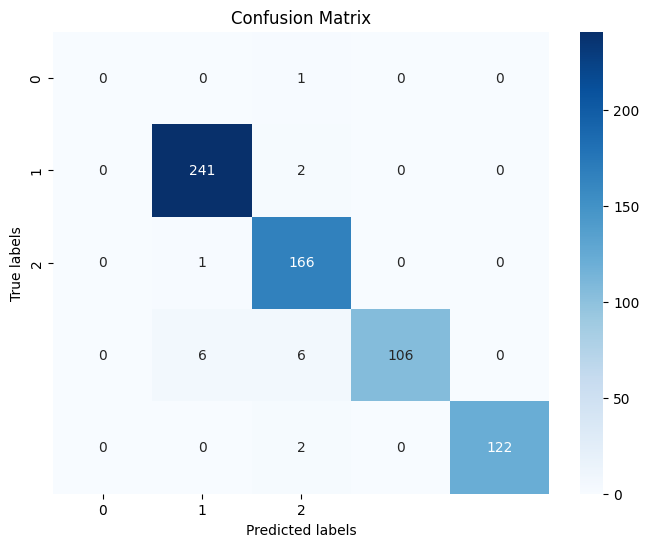

In [ ]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def filter_products(user_input):
    user_review = [user_input]
    user_review_transformed = tfidf_vectorizer.transform(user_review)
    predicted_product = rf_classifier.predict(user_review_transformed)
    return predicted_product[0]

# Simulating user input
user_input = input("Enter your review: ")
predicted_product = filter_products(user_input)
print("Recommended product based on your review:", predicted_product)


Enter your review: nike shoes
Recommended product based on your review: 4


In [ ]:
adidas shoes
